# Dimensionality Reduction

In many practical applications, although the data reside in a high-dimensional space, the true dimensionality, known as intrinsic dimensionality, can be of a much lower value.

 For example, in a three-dimensional space, the data may cluster around a straight line, or around the circumference of a circle or the graph of a parabola, arbitrarily placed in R^3. 

Below figure illustrates the three cases. Learning the lower-dimensional structure associated with a given set of data is gaining in importance in the context of big data processing and analysis. Some typical examples are the disciplines of computer vision, robotics, medical imaging, and computational neuroscience.

![img](https://i.imgur.com/IkFGd65.png)

The data reside close to (A) a straight line, (B) the circumference of a circle, and (C) the graph of a parabola in the three-dimensional space. In all three cases, the intrinsic dimensionality of the data is equal to one. In (A) the data are clustered around a (translated/affine) linear subspace and in (B) and (C) around one-dimensional manifolds.

#### Some notes on Terminologies used here - When I say x_i belongs to R^d that means x_i is a d-dimensional column vector

![img](https://i.imgur.com/ppkf04S.png)

Which is a d * 1 Matrix

So in the case of this famous [iris dataset](https://www.kaggle.com/arshid/iris-flower-dataset?select=IRIS.csv) x_i belongs to R^4 as it has 4-features and is a 4-dimensional dataset.

![img](https://i.imgur.com/GifMvTp.png)

#### The various methods used for dimensionality reduction include:

- Principal Component Analysis (PCA)

- Linear Discriminant Analysis (LDA)

- Generalized Discriminant Analysis (GDA)

Dimensionality reduction may be both linear or non-linear, depending upon the method used. The prime linear method, called Principal Component Analysis, or PCA, is discussed below.


# When should I use Dimensionality reduction

Think of PCA as an exploratory technique to investigate and study your system before doing other things. Dimensionality reduction, by nature, loses some information, just like image compression for instance. Consequently, it will often reduce the prediction quality of your model, but depending on the data it could also leave it unchanged or even improve it in some cases (very noisy data). In general, its main benefit will be to speed up training.

Besides speed of training, feature reduction also help with multicollinearity in some cases. Which is mainly an issue if you are interested in parameters estimation, like in causal analysis. For instance, if you use a multiple linear regression model to estimate the effect of some regressors on a dependent variable, multicollinearity will prevent proper parameters estimation because you won't be able to identify the effect of each regressor.

However, in many other ML applications, we don't really care about parameters identification, we care about how a set of variables can be used to predict another variable. If some variables are highly correlated, then there will be some redundant information in your data, but this shouldn't be problematic in terms of prediction quality.

In my experience, in couple of Kaggle Challenges, after doing some PCA, the accuracy has actually went down. After googling found out that some infer that PCA assumed that the variance could translate to high differentiable information which classifier could use. But at the same time, it threw some information away(not just noise), and these information could play a huge role in classification, although the variance is low.

---

# Data preparation for dimensionality reduction

There is no best technique for dimensionality reduction and no mapping of techniques to problems.

Instead, the best approach is to use systematic controlled experiments to discover what dimensionality reduction techniques, when paired with your model of choice, result in the best performance on your dataset.

Typically, linear algebra and manifold learning methods assume that all input features have the same scale or distribution. This suggests that it is good practice to either normalize or standardize data prior to using these methods if the input variables have differing scales or units.

# Comparison of feature selection, PCA, and clustering as dimension reduction schemes

![img](https://i.imgur.com/1KUD3gN.png)

The first 2 methods, Feature Selection and PCA reduce the dimension of the feature space, or in other words the number of rows in a data matrix. However, the two methods work differently: while feature selection literally selects rows from the original matrix to keep, PCA uses the geometry of the feature space to produce a new data matrix based on a lower feature dimensional version of the data. K-means, on the other hand, reduces the dimension of the data/number of data points, or equivalently the number of columns in the input data matrix. It does so by finding a small number of new averaged representatives or “centroids” of the input data, forming a new data matrix whose fewer columns (which are not
present in the original data matrix) are precisely these centroids.

# Mean Vector

The first step in analyzing multivariate data is computing the mean vector and the variance-covariance matrix.

The sample mean is a vector each of whose elements is the sample mean of one of the random variables – that is, each of whose elements is the arithmetic average of the observed values of one of the variables.

![img](https://i.imgur.com/XG2Yag7.png)

For example, take the following two vectors

x1 = [2.2, 4.2, …]

x2 = [1.2, 3.2, …]

So the formulae for calculating `x_mean = 1/2(x1+x2)`

= 0.5* [3.4, 7.4, ..]

= [1.7,3.7, .. ]

#### So we just summed up elements at ith index of the first array and the corresponding index of the second array.

#### That also means, that we can say every array can be considered as a vector with each of its indices as one of the dimensions.

# Covariance Matrix

Covariances Matrix consists of covariances between each pair of variables in the other matrix positions.

First a quick look at the difference between covariance and variance. Variance measures the variation of a single random variable (like the height of a person in a population), whereas covariance is a measure of how much two random variables vary together (like the height of a person and the weight of a person in a population). The formula for variance is given by

![img](https://i.imgur.com/CnnSCxv.png)

### Definition of Co-Variance for 2 scaler values from [Wikipedia](https://en.wikipedia.org/wiki/Covariance)

For two jointly distributed real-valued random variables X and Y with finite second moments, the covariance is defined as the expected value (or mean) of the product of their deviations from their individual expected values


![img](https://i.imgur.com/jE6qkN7.png)

where E[X] is the expected value of X, also known as the mean of X.


### Definition of Co-Variance for Matrix form of data - i.e. where the X (as defined in the above formulae is not a Scaler but is a Vector )

![img](https://i.imgur.com/eS35C7X.png)

#### and  very importantly the transpose appears in this case (for the Matrix form ) because we are multiplying two vectors.

#### In another form the formulae for the Covariance Matrix is

![img](https://i.imgur.com/AZ10i59.png)

Stressing the last point from above if the columns of the original Matrix are standardized, meaning making the column vectors such that the mean is zero and Standard Deviation is 1 the above formulate for Covariance of a Matrix becomes simply

#### XX^T/(n-1)

---

# Matrix Multiplication Basics - Explanation on why we are using the transpose of the second element in calculating Covariance Matrix

### Rules of matrix multiplication

#### a⋅b = a^Tb

On the other hand, **b⋅a≠baT**, which is an n×n matrix. The correct expression is

#### b⋅a = b^Ta

![img](https://i.imgur.com/ZrW2xUy.png)

We are indeed taking dot products here. Note, though, that a is a column vector, but a^T is a row vector.

By the rules of matrix multiplication, a^Ta and a^Tb result in a 1×1 matrix, which is equivalent to a scalar, while aa^T produces an n×n matrix:

![img](https://i.imgur.com/6xjyH0y.png)

[Source](https://math.stackexchange.com/a/1853890/517433)

Lets see a simple example of a 2*1 Matrix to understand the above vector multiplications and using the Transformed vector for the second element in the above formulae.

![img](https://i.imgur.com/KVAIo6b.png)

#### [To Read further on Dot product in matrix notation](https://mathinsight.org/dot_product_matrix_notation)

![img](https://i.imgur.com/sIBKvlv.png)


### Note on using the unbiased estimator (1/n-1) instead of (1/n)

This is termed as Bessel's correction. Think of it this way. When we calculate the sample standard deviation from a sample of n values, we are using the sample mean already calculated from that same sample of n values. The calculated sample mean has already "used up" one of the "degrees of freedom of variability"(which is the mean itself) that is available in the sample. Only n-1 degrees of freedom of variability are left for the calculation of the sample standard deviation.

For further details on Bessel's Correction read the following

- http://vortex.ihrc.fiu.edu/MET4570/members/Lectures/Lect05/m10divideby_nminus1.pdf
- https://math.stackexchange.com/questions/61251/intuitive-explanation-of-bessels-correction

---

Let’s start with the below matrix.

```python
A = [[1, 3, 5],
       [5, 4, 1],
       [3, 8, 6]]
```

That is our original dataframe is of the below form.

![img](https://i.imgur.com/UMS11Dc.png)

### We will calculate the covariance between the first and the third column vectors (x1 and x3 features):

![img](https://i.imgur.com/J2A8cos.png)

![img](https://i.imgur.com/BZbzA1m.png[/img])

So, that’s the value (-2.67 ) of the covariance matrix.

Now use numpy to do build the full Covariance Matrix. Importantly, here I want NumPy to use the columns as vectors, so the parameter `rowvar=False` has to be used. Also, `bias=True` divides by n and not by n-1.

In [1]:
import numpy as np

A = np.array([[1, 3, 5], [5, 4, 1], [3, 8, 6]])
# A = np.array([[ 3, 5], [4, 1], [8, 6]])
print(A)

# array([[1, 3, 5],
#        [5, 4, 1],
#        [3, 8, 6]])

cov_matrix = np.cov(A, rowvar=False, bias=True )
cov_matrix

# array([[ 2.66666667, 0.66666667, -2.66666667],
#        [ 0.66666667, 4.66666667, 2.33333333],
#        [-2.66666667, 2.33333333, 4.66666667]])

[[1 3 5]
 [5 4 1]
 [3 8 6]]


array([[ 2.66666667,  0.66666667, -2.66666667],
       [ 0.66666667,  4.66666667,  2.33333333],
       [-2.66666667,  2.33333333,  4.66666667]])

#### The diagonal elements of this matrix are the variances of the variables, and the off-diagonal elements are the covariances between the variables.

In below image all green highlighted are the variances and the rest (red highlighted) are the co-variances

![img](https://i.imgur.com/8PJ5lMV.png)

## Note, the Dimension of the Co-Variance Matrix will always be a Square Matrix -

A Square Matrix is one with same number of rows and columns). Because they capture the covariance between any Variable and any other Variable. So we need all the Variables (Features in a dataset) on the columns and also all the variables on the rows in the resultant Co-Variance Matrix. Thats why in the above image I have put all of x1, x2, x3 in both the columns and rows.

#### So, m-dimensional data will result in mxm covariance matrix

Basically for three variables (or 3 dimensions of a dataset or 3 features of a dataset) X, Y and Z we will get the Covariance Matrix as following

![img](https://i.imgur.com/AAq7ZC1.png)

![img](https://i.imgur.com/j0vnWlR.png)

Thus,

- 2.66666667 is the variance of the x1 variable,

- 0.66666667 is the covariance between x1 and x2 variables,

- -2.66666667 is the covariance between x1 and x3 variables,

- 4.66666667 is the variance of x2,

- 2.33333333 is the covariance between x2 and x3 and

- 4.66666667 is the variance of x3.

#### The mean vector is often referred to as the centroid and the variance-covariance matrix as the dispersion or dispersion matrix. Also, the terms variance-covariance matrix and covariance matrix are used interchangeably.

## Properties of Co-Variance Matrix



---

# Principal Component Analysis

PCA stands for Principal Component Analysis. Here is what Wikipedia says about PCA.

"Given a collection of points in two, three, or higher dimensional space, a “best fitting” line can be defined as one that minimizes the average squared distance from a point to the line. The next best-fitting line can be similarly chosen from directions perpendicular to the first. Repeating this process yields an orthogonal basis in which different individual dimensions of the data are uncorrelated. These basis vectors are called principal components, and several related procedures principal component analysis (PCA)."

So, PCA means extracting the components (features) which are most effective in forecasting the target variable in a dataset, and discarding the redundant features. Thus, we calculate the Principal Components to achieve Dimensionality reduction.

PCA ( aka Karhunen–Loève transform in Mathematics ) is among the oldest and most widely used methods for dimensionality reduction [105]. The assumption underlying PCA, as well as any dimensionality reduction technique, is that the observed data are generated by a system or process that is driven by a (relatively) small number of latent (not directly observed) variables. The goal is to learn this latent structure.

Here's a visual representation of PCA being applied to a simple 2-D data set (left, in blue)

![img](https://i.imgur.com/lKK6Gts.png)

As we can see above dimension reduction via PCA retains much of the structure of the original data. The ideal subspace is shown in black in the left panel, and the data projected onto this subspace is shown in blue on the right. (bottom panels)

Before using PCA, we must standardize our dataset. The method won’t work if we have entirely different scales for our data. Standardization helps to avoid biased outcomes.

For example, suppose there are three variables – v1 in a 1-10 range, v2 in a 10-100 range, and v3 in a 100,000 to 1,000,000 range. If we just go ahead and compute an output using these predictors, we’ll get a heavily biased result because the third variable will have a disproportionately large impact on the output value.

#### Step-1 So, Before applying PCA, we must ensure that all our attributes (dimensions) are centered around zero and have a standard deviation of 1. So, the first thing we do is calculate the means for all of them. Then, we center the values in each column (to do so we subtract the mean column value) and calculate the covariance matrix for the resulting centered matrix.

Now, we can calculate our first principal component.

#### Step-2 - Next, we utilize one of the methods for breaking up matrices (eigendecomposition or singular value decomposition) to turn our matrix into a list of eigenvectors that will define directions of axes in the new subspace and eigenvalues that will show the magnitude of those directions.

We sort the vectors by their eigenvalues in decreasing order and thus get a ranking of the principal components.

#### Step-3 - Now finally, we can ditch some of the dimensions and project our dataset into a reduced subspace without losing important information about the original dataset. And since new axes capture the maximum variance in the data, any clustering algorithm we’re going to apply next will have an easier time grouping the data instances.

Lets look at it visually,

Imagine this is our dataset that we’re trying to cluster; we only have two dimensions.

![img](https://i.imgur.com/CUWkBzi.png)

If we project the data onto the horizontal axis (our attribute 1) we won’t see much spread; it will show a nearly equal distribution of the observations.

![img](https://i.imgur.com/s5O8hYn.png)

Attribute 2, obviously, isn’t hugely helpful either.

![img](https://i.imgur.com/6VnyFk7.png)

As the data points in this case are spreading diagonally so we need a new line that would better capture this.

![img](https://i.imgur.com/B9MtmIg.png)

#### This axis is our first Principle Component (PC) – a new direction (we can imagine it to be an attribute) that maximizes the variance of the data (and thus the clusters become much more obvious.) Besides maximizing the spread, this first PC sits through the direction in the data that minimizes the distances between all the points and the new axis.

#### The second PC must represent the second maximum amount of variance; it’s going to be a line that’s orthogonal to our first axis.

![img](https://i.imgur.com/ocDf36C.png)

Because of the underlying PCA-Math being based on eigenvectors and eigenvalues, new principal components will always come out orthogonal to the ones before them. **Eigenvectors**, simply, are vectors that aren’t knocked off of their span by a linear transformation; they can hold on to their original direction while being stretched, shrunk or reversed. Eigenvalues are factors by which these special vectors are scaled.



# Key concept of Preserving the Variance by Projection of Data

#### Before we can project the training set onto a lower-dimensional hyperplane, we first need to choose the right hyperplane. For example, in the below figure, a simple 2D dataset is represented on the left, along with three different axes (i.e., 1D hyperplanes). On the right is the result of the projection of the dataset onto each of these axes. As we can see, the projection onto the solid line preserves the maximum variance, while the projection onto the dotted line preserves very little variance and the projection onto the dashed line preserves an intermediate amount of variance.

![img](https://i.imgur.com/Fp8kqgJ.png)

#### It seems reasonable to select the axis that preserves the maximum amount of variance, as it will most likely lose less information than the other projections. Another way to justify this choice is that it is the axis that minimizes the mean squared distance between the original dataset and its projection onto that axis. This is the basic idea behind PCA.

PCA identifies the axis that accounts for the largest amount of variance in the train-ing set. In above figure, it is the solid line. It also finds a second axis, orthogonal to the first one, that accounts for the largest amount of remaining variance. In this 2D example there is no choice: it is the dotted line (i.e. the orthogonal one). If it were a higher-dimensional data‐set, PCA would also find a third axis, orthogonal to both previous axes, and a fourth, a fifth, and so on—as many axes as the number of dimensions in the dataset. The ith axis is called the ith principal component (PC) of the data. In above figure, the first PC is the axis on which vector c1 lies, and the second PC is the axis on which vector c2 lies. In case of 3-D dataset the first two PCs are the orthogonal axes on which the two arrows lie, on the plane, and the third PC is the axis orthogonal to that plane, like in the below figure.

![img](https://i.imgur.com/wEHwUMl.png)


For each principal component, PCA finds a zero-centered unit vector pointing in the direction of the PC. Since two opposing unit vectors lie on the same axis, the direction of the unit vectors returned by PCA is not stable: if you perturb the training set slightly and run PCA again, the unit vectors may point in the oppo‐
site direction as the original vectors. However, they will generally still lie on the same axes. In some cases, a pair of unit vectors may even rotate or swap (if the variances along these two axes are close), but the plane they define will generally remain the same.


# Eigenvalues and Eigenvectors
Many problems present themselves in terms of an eigenvalue problem:

###  A·v=λ·v

In this equation A is an n-by-n matrix, v is a non-zero n-by-1 vector and λ is a scalar (which may be either real or complex).  Any value of λ for which this equation has a solution is known as an eigenvalue of the matrix A.

To begin, let $v$ be a vector (shown as a point) and $A$ be a matrix with columns $a_1$ and $a_2$ (shown as arrows). If we multiply $v$ by $A$, then $A$ sends $v$ to a new vector $Av$.

![img](https://i.imgur.com/xBy93Vd.png)


If you can draw a line through the three points $(0,0)$, $v$ and $Av$, then $Av$ is just $v$ multiplied by a number $\lambda$; that is, $Av = \lambda v$. In this case, we call $\lambda$ an eigenvalue and $v$ an eigenvector.

This means that the linear transformation A on vector **v** is completely defined by λ.

In the linear algebra literature and software, it is often a convention that eigenvalues are sorted in descending order, so that the largest
eigenvalue and associated eigenvector are called the first eigenvalue and its associated eigenvector, and the second largest called the second eigenvalue and its associated eigenvector, and so on.

An eigenvector is a vector whose direction remains unchanged when a linear transformation is applied to it.


### Usefulness of Eigenvalues and Eigenvectors

If you keep multiplying $v$ by $A$, you get a sequence ${ v, Av, A^2v,}$ etc. Eigenspaces attract that sequence and eigenvalues tell you whether it ends up at $(0,0)$ or far away. Therefore, eigenvectors/values tell us about systems that evolve step-by-step.

![img]https://i.imgur.com/1hXen7o.png[/img]

### Properties of eigenvalues and eigenvectors

- Let A be a $K	imes K$ square matrix. A scalar $lambda $ is an eigenvalue of A if and only if it is an eigenvalue of $A^{intercal }$.

-  For symmetric matrix, the eigenvectors are always orthogonal

In general, for any matrix, the eigenvectors are NOT always orthogonal. But for a special type of matrix, symmetric matrix, the eigenvalues are always real and the corresponding eigenvectors are always orthogonal.

For any matrix M with n rows and m columns, M multiplies with its transpose, either M*M' or M'M, results in a symmetric matrix, so for this symmetric matrix, the eigenvectors are always orthogonal.

In the application of PCA, a dataset of n samples with m features is usually represented in a n* m matrix D. The variance and covariance among those m features can be represented by a m*m matrix D'*D, which is symmetric (numbers on the diagonal represent the variance of each single feature, and the number on row i column j represents the covariance between feature i and j). The PCA is applied on this symmetric matrix, so the eigenvectors are guaranteed to be orthogonal.


#### During Steps PCA calculation steps we need the Eigenvectors as below

- Step-A => Standardize the Columns

- Step-B => Build the Covariance-Matrix S which is $(X^T * X)$

- Step-C => Get the EigneVectors of this Covariance-Matrix S. These will be sorted from largest λ and downwards.

- Step-D => And my **u1** is the Eigenvector **v1** which is the largest Eigenvector corresponding to the largest Eigenvalue

![img](https://i.imgur.com/grOzxqv.png)

### Significance of Eigenvectors for a 10-Dimensional dataset - Below is a Geometric interpretation

#### The highest Eigenvector v1 (corresponding to the max lambda i.e. max Eigenvalue ) - is the vector representing the direction with the highest Variance (Principal Component). Then v2 is the direction with the second highest variance

![img](https://i.imgur.com/Y4NLf1I.png)

[Source-AppliedAI Course Youtube Video](https://www.youtube.com/watch?v=b0DHvcdIStE&feature=emb_logo&ab_channel=AppliedAICourse)


### Significance of Eigenvalues (Lambdas) for a 2-Dimensional dataset - a Geometric interpretation

#### A particular Lambda in a particular direction / Summation of All Lambdas - tells me the % of the Variances retained in that direction.

![img](https://i.imgur.com/WCX268w.png)

So in the above picture, for the middle graph (representing a 2-d dataset) - lambda-1 retains (3/4)th or 75% of the variances.

[Source-AppliedAI Course Youtube Video](https://www.youtube.com/watch?v=b0DHvcdIStE&feature=emb_logo&ab_channel=AppliedAICourse)


#### That means the dot product of two eigenvectors of a Symmetric Matrix is always zero

![img](https://i.imgur.com/lzlNX4Y.png)


---

# The Mathematics of PCA

### Under the Maximum Variance Formulae

### First here is the what the Projection Vector looks like geometrically, for point x_i and also the mathematical formula of point x_i on the Principle Component Vector u_1

![img](https://i.imgur.com/WirAvCo.png)

In English the here the Math Objective of the Problem - assuming **u1** represents the Principle component Vector

### Find u1, such that the the Variance of points x_i ( i going from 1 to n) projected onto u1 is maximized

Mathematically

![img](https://i.imgur.com/E5mMcaD.png)

A slightly more formally

![img](https://i.imgur.com/teprtEQ.png)

[Source of above Image](https://www.cs.toronto.edu/~urtasun/courses/CSC411/tutorial8.pdf)

#### But note our original dataset Matrix has been centered or column-standardized, hence

![img](https://i.imgur.com/yAj6dE6.png)

### So the final Objective function becomes

![img](https://i.imgur.com/ByyY9Wr.png)

### So extending the above, our absolute final target is to find u_1 for which the above variance will be maximized.

---

Don’t confuse PCA with linear regression. PCA is to minimize the distance of the orthogonal projection, while linear regression is to minimize the distance on the y-axis.

![img](https://i.imgur.com/x3cFb0o.png)

[Source of above image](http://alexhwilliams.info/itsneuronalblog/2016/03/27/pca/)

# Why is minimizing squared residuals equivalent to maximizing variance?

To ans this question I could not find a better explanations than has been described **[here in this blog](http://alexhwilliams.info/itsneuronalblog/2016/03/27/pca/)**

![img](https://i.imgur.com/w7gM6lu.png)

 Where **w** is the projection of each datapoint onto the top principal component and the vector **c**  is the top principal component

## Important Note - PCA assumes that the dataset is centered around the origin.

As we will see, Scikit-Learn’s PCA classes take care of centering the data for you. If you implement PCA yourself, or if you use other libraries, don’t forget to center the data first

# Now I will Calculate the PCA for MNIST data quite manually using the steps described earlier, which are

- Step-A => Standardize the Columns

- Step-B => Build the Covariance-Matrix S which is $(X^T * X)$

- Step-C => Get the EigneVectors of this Covariance-Matrix S. These will be sorted from largest λ and downwards. And my **u1** is the Eigenvector **v1** which is the largest Eigenvector corresponding to the largest Eigenvalue

- Step-D => Now I need to project the original data sample on the plane formed by two principle eigenvectors by vector-vector multiplication.

### The training dataset is 42,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9. The task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively.

In [2]:

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("dark")
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler

In [3]:
# In my local Machine, I ah only taking fewer rows for faster local training and development
# In Kaggle comment-out below line
# train_df_org = pd.read_csv('kaggle/input/digit-recognizer/train.csv',  nrows=1000)
# test_df_org = pd.read_csv('kaggle/input/digit-recognizer/test.csv',  nrows=1000)

# Instead, uncomment the below one, where the whole dataset is taken for training
train_df_org = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_df_org = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

print("train_df_org shape ", train_df_org.shape) #  (1000, 785)
print("test_df_org shape ", test_df_org.shape)

train_df_org.head()

train_df_org shape  (42000, 785)
test_df_org shape  (28000, 784)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# In test df there should not be any label column.
# lets see it.
test_df_org.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In below the labels variable contains the labels and then from the 'train_df_org' (which contains all the actual image pixel) I will drop 'label' column

In [5]:
labels = train_df_org['label']
labels.shape


(42000,)

In [6]:
train_df_for_pca = train_df_org.drop(['label'], axis=1)
train_df_for_pca.shape
# In pandas, drop( ) function is used to remove column(s).axis=1 tells Python that you want to apply function on columns instead of rows.

(42000, 784)

#### Step-A: Data-preprocessing: Standardizing the train dataframe
#### `(x - mean) / s.d`

In [7]:
standardized_data = StandardScaler().fit_transform(train_df_for_pca)
print(standardized_data.shape)

(42000, 784)


#### Step-B: Now build the c-variance matrix which is :

### $A^T * A$

In [8]:
sample_data = standardized_data

# Matrix multiplication with numpy
covariance_matrix = np.matmul(sample_data.T, sample_data)

# As the sample_data has 784 columns, so the co-variance matrix shape
# should be 784 * 784
print('Shape of Co-variance matrix = ', covariance_matrix.shape)


Shape of Co-variance matrix =  (784, 784)


#### Step-C => Get the EigneVectors of this Covariance-Matrix S for projecting onto a 2-D space. These Eigenvectors will be sorted by the value of λ.

In [9]:
from scipy.linalg import eigh

# eigh function will give me the eigenvalues in ascending order with zero-index
# subset_by_index is an optional and iterable parameter
# If provided, this two-element iterable defines the start and the end indices
# of the desired eigenvalues (ascending order and 0-indexed).
# To return only the second smallest to fifth smallest eigenvalues, [1, 4] is used.
# [n-3, n-1] returns the largest three.
# Only available with “evr”, “evx”, and “gvx” drivers. The entries are directly converted to integers via int().

# Needed to comment out below line containing 'subset_by_index' parameter, as it would fail
# in Kaggle, probably because of the driver requirement.
# eigenvalues, eigenvectors = eigh(covariance_matrix, subset_by_index=(782, 783) )

# instead using 'eigvals' which is deprecated per doc
eigenvalues, eigenvectors = eigh(covariance_matrix, eigvals=(782, 783) )
print('Shape of Eigenvectors ', eigenvectors.shape )

# In above I am only passing 782 and 783 as eigvalues becuase
# Our target is to reduce the 784-dimension data to 2-dimension data and plot it.
# So we need the top 2 eigvalues.

Shape of Eigenvectors  (784, 2)


So you have the principal components. They are eigenvectors of the _covariance_ matrix $X^T X$.

A way to retrieve the eigenvalues from there is to apply this matrix to each principal components and project the results onto the component.
Let v_1  be the first principal component and lambda_1 the associated eigenvalue. We have:
[![eq][1]][1] and thus:
[![eq2][2]][2] since [![eq3][3]][3]. (x, y)  the scalar product of vectors x and y.

[1]: http://i.stack.imgur.com/6OApA.gif
[2]: http://i.stack.imgur.com/iCZcI.gif
[3]: http://i.stack.imgur.com/8pGd1.gif

In [10]:
# now converting the eigenvectors into (2, d) shape for ease of computation further ahead
eigenvectors = eigenvectors.T


 #### eigenvectors[0] represents the eigenvector corresponding to 1st Principal Component
 #### eigenvectors[1] represents the eigenvector corresponding to 2nd Principal Component

Now finally our target which was to reduce the 784-dimension data to 2-dimension data and plot it.

#### Step*D => Now I need to project the original data sample on the plane formed by two principle eigenvectors by vector-vector multiplication.

#### Simplest Formulate to Refer for Vector Projection

![img](https://i.imgur.com/enenSdD.png)

[Source](https://users.math.msu.edu/users/gnagy/teaching/11-fall/mth234/L03-234.pdf)

In [11]:
projected_vec = np.matmul(eigenvectors, sample_data.T)
projected_vec.shape
# Now we will see this is a 2-dimensional data

(2, 42000)

Now I will use vstack() function to Stack arrays in sequence vertically (row wise). This function makes most sense for arrays with up to 3 dimensions. For instance, for pixel-data with a height (first axis), width (second axis), and r/g/b channels (third axis).

```python
a = np.array([1, 2, 3])
b = np.array([2, 3, 4])
np.vstack((a,b))
array([[1, 2, 3],
       [2, 3, 4]])
```


In [12]:
# appending label to the 2-d projected data
projected_vec = np.vstack((projected_vec, labels)).T
projected_vec.shape

(42000, 3)

In [13]:
# The projected_vec at this point is still in array form and so we can not apply
# head() function to it directly and also for plotting purpose, I need to make a dataframe from it.
# creating a new dataframe from plotting the labeled points
pca_dataframe = pd.DataFrame(data=projected_vec, columns=('1st_principal_comp', "2nd_principal_comp", 'labels') )
pca_dataframe.head()


,1st_principal_comp,2nd_principal_comp,labels
0,-5.226445,-5.140478,1.0
1,6.032996,19.292332,0.0
2,-1.705813,-7.644503,1.0
3,5.836139,-0.474207,4.0
4,6.024818,26.559574,0.0


So in above each row is x_i which was originally 784 dimensions and now they are in 2-dimensions by applying PCA.

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


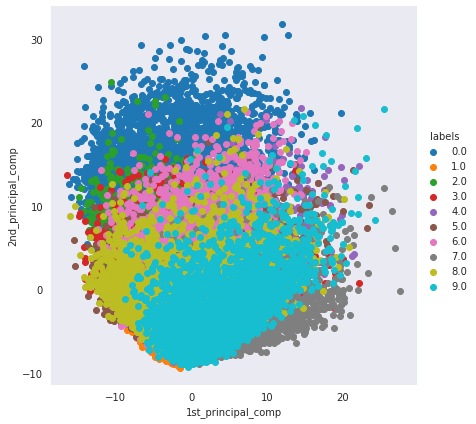

In [14]:
sns.FacetGrid(pca_dataframe, hue='labels', size=6).map(plt.scatter, '1st_principal_comp', "2nd_principal_comp").add_legend()
plt.show()

And we can see some degree of classifications among the digits. For example, all zeros are on the top left corner. All the sixes (oranges) are towards the bottom between 0 and 4 on the x-axis.

# Now deriving PCA with scikit-learn's PCA function

In [15]:
pca = decomposition.PCA()
pca.n_components = 2
pca_data_with_scikit = pca.fit_transform(standardized_data)
pca_data_with_scikit.shape


(42000, 2)

In [16]:
pca_data_with_scikit = np.vstack((pca_data_with_scikit.T, labels)).T
pca_data_with_scikit.shape

(42000, 3)

In [17]:
df_PCA_scikit = pd.DataFrame(data=pca_data_with_scikit, columns=('f1_PC', 'f2_PC', 'labels'))
df_PCA_scikit.head()

,f1_PC,f2_PC,labels
0,-5.140537,-5.226908,1.0
1,19.292341,6.032901,0.0
2,-7.644474,-1.705817,1.0
3,-0.474191,5.836522,4.0
4,26.559576,6.024879,0.0


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


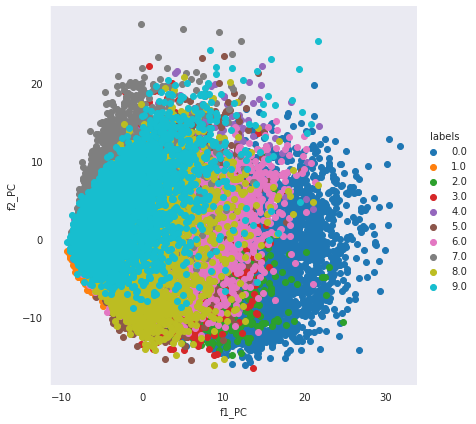

In [18]:
sns.FacetGrid(df_PCA_scikit, hue='labels', size=6).map(plt.scatter, 'f1_PC', 'f2_PC').add_legend()
plt.show()

And I am getting almost similar plotting that we got with the manual steps to calculate Principle Components. Main difference with sickit-learn the axes are reversed.


# Plot to show how Variance Retained increases as we increase the Number of Principle components

In [19]:
print('Shape of standardized_data ', standardized_data.shape)

pca.n_components = 784
pca_data_scikit_2 = pca.fit_transform(standardized_data)
percent_variance_retained = pca.explained_variance_ / np.sum(pca.explained_variance_)
cumulative_variance_retained = np.cumsum(percent_variance_retained)

Shape of standardized_data  (42000, 784)


Explanation of the line `percent_variance_retained = pca.explained_variance_ / np.sum(pca.explained_variance_)`

Its calculation the for each lambda values, the percentage retained by that specific lambda value.

![img](https://i.imgur.com/gDPEeVn.png)

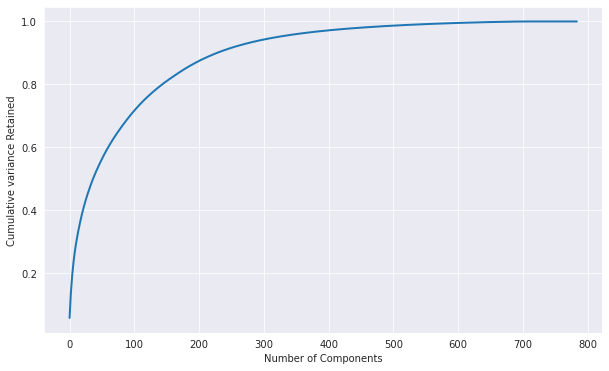

In [20]:
plt.figure(1, figsize=(10, 6))
plt.clf()
plt.plot(cumulative_variance_retained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('Number of Components')
plt.ylabel('Cumulative variance Retained')
plt.show()

So above was all about Dimensionality Reduction and PCA

# Now for the Competition I will run a CNN Model on the MNIST dataset


In [21]:
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras import metrics
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Lambda, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D, AvgPool2D
from tensorflow.keras.optimizers import Adadelta
from keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import LearningRateScheduler

In [22]:
# train_df_org = pd.read_csv('kaggle/input/digit-recognizer/train.csv',  nrows=1000)

# train_df_org = pd.read_csv('/kaggle/input/digit-recognizer/train.csv',  nrows=1000)

# Now dataframe with only 'label' column
mnist_train_label = train_df_org.loc[:, "label"]
# print(mnist_train_label.shape) # (48000,)

mnist_train_df = train_df_org.loc[:, "pixel0":]
# print(mnist_train_df.shape) # (48000, 784)


In [23]:
# Now convert the dataframes into numpy arrays
mnist_train_array = np.array(mnist_train_df)
mnist_train_label_array = np.array(mnist_train_label)

# Now need to do a little reshaping to get the structure which the model will expect to receive going forward
mnist_train_array = mnist_train_array.reshape(mnist_train_array.shape[0], 28, 28, 1)
print(mnist_train_array.shape, mnist_train_label_array.shape)
print(mnist_train_label_array)

(42000, 28, 28, 1) (42000,)
[1 0 1 ... 7 6 9]


# CNN Model Building
Training a neural network with one input layer, one hidden layer and one output layer for learning the digits in images.

#### Encoding the labels and making them as the class value and finally converting them as categorical values.

Using the method **to_categorical()**, a numpy array (or) a vector which has integers that represent different categories, can be converted into a numpy array (or) a matrix which has binary values and has columns equal to the number of categories in the data. For example, label ‘3’ should be converted to a vector [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] for model building. This function returns a matrix of binary values (either ‘1’ or ‘0’). It has number of rows equal to the length of the input vector and number of columns equal to the number of classes.

So the whole mnist_train_label would look like below

```python
[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
```

In [24]:
num_of_digit_classes = mnist_train_label_array.max() - mnist_train_label_array.min() + 1
mnist_train_label_array = to_categorical(mnist_train_label_array, num_classes=num_of_digit_classes)
print('Shape of ytrain after encoding and converting to categorical values ', mnist_train_label_array.shape)
print(mnist_train_label_array)


Shape of ytrain after encoding and converting to categorical values  (42000, 10)
[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [25]:
def run_model(input_shape=(28, 28, 1)):
    model = Sequential()
    model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(32, kernel_size = 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(64, kernel_size = 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size = 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(128, kernel_size = 4, activation='relu'))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(10, activation='softmax'))
    return model

def run_model_compilation(model, optimizer='adam', loss='categorical_crossentropy'):
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

def run_model_training(model, train, test, epochs, split):
    history=model.fit(train, test, shuffle=True, epochs=epochs, validation_split=split )
    return history

# Neural Network Model's parameters explained

### Sequential() -

A sequential model, which is a linear stack of layers as the name suggests, allows you to create models layer-by-layer in a step-by-step fashion. Keras Sequential API is by far the easiest way to get up and running with Keras, but it is s also the most limited — you cannot create models that:

Share layers
Have branches (at least not easily)
Have multiple inputs
Have multiple outputs

The model needs to know what input shape it should expect. For this reason, the first layer in a sequential model (and only the first, because following layers can do automatic shape inference) needs to receive information about its input shape.

As illustrated in the example above, this is done by passing an input_shape argument to the first layer. This is a list of integers or NULL entries, where NULL indicates that any positive integer may be expected. In input_shape, the batch dimension is not included.

If you ever need to specify a fixed batch size for your inputs (this is useful for stateful recurrent networks), you can pass a batch_size argument to a layer. If you pass both batch_size=32 and input_shape=c(6, 8) to a layer, it will then expect every batch of inputs to have the batch shape (32, 6, 8).

### The activation parameter

The activation parameter to the Conv2D class is simply a convenience parameter, allowing you to supply a string specifying the name of the activation function you want to apply after performing the convolution.

### ReLU (Rectified Linear Unit) Activation Function

- The ReLU is the most used activation function in the world right now.Since, it is used in almost all the convolutional neural networks or deep learning.

### The ReLU function is f(x)=max(0,x).

![img](https://i.imgur.com/2ezpnE3.png)

As you can see, the ReLU is half rectified (from bottom). f(z) is zero when z is less than zero and f(z) is equal to z when z is above or equal to zero.
Range: [ 0 to infinity)
The function and its derivative both are monotonic.
But the issue is that all the negative values become zero immediately which decreases the ability of the model to fit or train from the data properly. That means any negative input given to the ReLU activation function turns the value into zero immediately in the graph, which in turns affects the resulting graph by not mapping the negative values appropriately.

One way ReLUs improve neural networks is by speeding up training. The gradient computation is very simple (either 0 or 1 depending on the sign of x). Also, the computational step of a ReLU is easy: any negative elements are set to 0.0 -- no exponentials, no multiplication or division operations.

Gradients of logistic and hyperbolic tangent networks are smaller than the positive portion of the ReLU. This means that the positive portion is updated more rapidly as training progresses. However, this comes at a cost. The 0 gradient on the left-hand side is has its own problem, called "dead neurons," in which a gradient update sets the incoming values to a ReLU such that the output is always zero; modified ReLU units such as ELU (or Leaky ReLU, or PReLU, etc.) can ameliorate this.

### BatchNormalization in Keras -

The layer will transform inputs so that they are standardized, meaning that they will have a mean of zero and a standard deviation of one.

During training, the layer will keep track of statistics for each input variable and use them to standardize the data.

Further, the standardized output can be scaled using the learned parameters of Beta and Gamma that define the new mean and standard deviation for the output of the transform. The layer can be configured to control whether these additional parameters will be used or not via the “center” and “scale” attributes respectively. By default, they are enabled.

The statistics used to perform the standardization, e.g. the mean and standard deviation of each variable, are updated for each mini batch and a running average is maintained.

A “momentum” argument allows you to control how much of the statistics from the previous mini batch to include when the update is calculated. By default, this is kept high with a value of 0.99. This can be set to 0.0 to only use statistics from the current mini-batch, as described in the original paper.

### Keras Conv2D is a 2D Convolution Layer

This layer creates a convolution kernel that is wind with layers input which helps produce a tensor of outputs.

Kernel: In image processing kernel is a convolution matrix or masks which can be used for blurring, sharpening, embossing, edge detection, and more by doing a convolution between a kernel and an image.

#### Filters

The first required Conv2D parameter is the number of filters that the convolutional layer will learn.

![img](https://i.imgur.com/j38MUoW.png)

The Keras Conv2D parameter, filters determines the number of kernels to convolve with the input volume. Each of these operations produces a 2D activation map.

Layers early in the network architecture (i.e., closer to the actual input image) learn fewer convolutional filters while layers deeper in the network (i.e., closer to the output predictions) will learn more filters.

Conv2D layers in between will learn more filters than the early Conv2D layers but fewer filters than the layers closer to the output. Let’s go ahead and take a look at an example:

So filter is a mandatory Conv2D parameter. It is an integer value and also determines the number of output filters in the convolution.

`model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = input_shape))`

In above line we are learning a total of 32 filters.
As far as choosing the appropriate value for no. of filters, it is always recommended to use powers of 2 as the values.

Read more on Keras Conv2D [here](https://missinglink.ai/guides/keras/keras-conv2d-working-cnn-2d-convolutions-keras/) - Some excerpts from this

#### What is a 2D Convolution Layer, the Convolution Kernel and its Role in CNN Image Classification

Briefly, some background. A convolution layer “scans” A source image with a filter of, for example, 5×5 pixels, to extract features which may be important for classification. This filter is also called the convolution kernel. The kernel also contains weights, which are tuned in the training of the model to achieve the most accurate predictions.

In a 5×5 kernel, for each 5×5 pixel region, the model computes the dot products between the image pixel values and the weights defined in the filter.

A 2D convolution layer means that the input of the convolution operation is three-dimensional, for example, a color image which has a value for each pixel across three layers: red, blue and green. However, it is called a “2D convolution” because the movement of the filter across the image happens in two dimensions. The filter is run across the image three times, once for each of the three layers.

After the convolution ends, the features are downsampled, and then the same convolutional structure repeats again. At first, the convolution identifies features in the original image (for example in a cat, the body, legs, tail, head), then it identifies sub-features within smaller parts of the image (for example, within the head, the ears, whiskers, eyes). Eventually, this process is meant to identify the essential features that can help classify the image.

### The kernel_size.

The kernel_size must be an odd integer.

Typical values for kernel_size include: (1, 1) , (3, 3) , (5, 5) , (7, 7) . It’s rare to see kernel sizes larger than 7×7.

So, when do you use each?

If your input images are greater than 128×128 you may choose to use a kernel size > 3 to help (1) learn larger spatial filters and (2) to help reduce volume size.

### strides

The strides parameter is a 2-tuple of integers, specifying the “step” of the convolution along the x and y axis of the input volume.

The strides value defaults to (1, 1) , implying that:

A given convolutional filter is applied to the current location of the input volume
The filter takes a 1-pixel step to the right and again the filter is applied to the input volume
This process is performed until we reach the far-right border of the volume in which we move our filter one pixel down and then start again from the far left
Typically you’ll leave the strides parameter with the default (1, 1) value; however, you may occasionally increase it to (2, 2) to help reduce the size of the output volume (since the step size of the filter is larger).

Typically you’ll see strides of 2×2 as a replacement to max pooling

### padding

The padding parameter to the Keras Conv2D class can take on one of two values: valid or same .

With the valid parameter the input volume is not zero-padded and the spatial dimensions are allowed to reduce via the natural application of convolution.

If you instead want to preserve the spatial dimensions of the volume such that the output volume size matches the input volume size, then you would want to supply a value of same for the padding :

### Dropout

From Tensorflow [Docs](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout)

The parameter `rate` - Float between 0 and 1. Fraction of the input units to drop.

The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.

Note that the Dropout layer only applies when training is set to True such that no values are dropped during inference. When using model.fit, training will be appropriately set to True automatically, and in other contexts, you can set the kwarg explicitly to True when calling the layer.

The following taken from this very informative [blog](https://towardsdatascience.com/understanding-and-implementing-dropout-in-tensorflow-and-keras-a8a3a02c1bfa)

Neural networks have hidden layers in between their input and output layers, these hidden layers have neurons embedded within them, and it’s the weights within the neurons along with the interconnection between neurons is what enables the neural network system to learn.
The general idea in Neural networks is that the more neurons and layers within a neural network architecture, the greater the representational power it has. This increase in representational power means that the neural network can fit more complex functions and generalize well to training data.
Simply kept, there are more configurations for the interconnections between the neurons within the neural network layers.

The disadvantage of utilizing deeper neural networks is that they are highly prone to overfitting.
Overfitting is a common problem that is defined as the inability for a trained machine learning model to generalized well to unseen data, but the same model performs well on the data it was trained on.
The primary purpose of dropout is to minimize the effect of overfitting within a trained network.
Dropout technique works by randomly reducing the number of interconnecting neurons within a neural network. At every training step, each neuron has a chance of being left out, or rather, dropped out of the collated contribution from connected neurons.

This technique minimizes overfitting because each neuron becomes independently sufficient, in the sense that the neurons within the layers learn weight values that are not based on the cooperation of its neighbouring neurons. Supposedly you trained 7,000 different neural network architecture, to select the best one you simply take the average of all 7,000 trained neural network.

Well, the dropout technique actually mimics this scenario.
If the probability of a neuron getting dropped out in a training step is set to 0.5; we are actually training a variety of different network at each training step as it’s highly impossible that the same neurons are excluded at any two training steps. Therefore a neural network that has been trained utilizing the dropout technique is an average of all the different neurons connection combinations that have occurred at each training step.

## Training and evaluating the model

After the model architecture is defined and compiled, the model needs to be trained with training data to be able to recognize the handwritten digits.
Here, one epoch means one forward and one backward pass of all the training samples. Batch size implies number of training samples in one forward/backward pass.

In [26]:
# Now actually train the model implementing all the functions above
cnn_model = run_model((28,28, 1))
run_model_compilation(cnn_model, 'adam', 'categorical_crossentropy')

# Taining the model specifying epocs
model_history = run_model_training(cnn_model, mnist_train_array, mnist_train_label_array, 75, 0.2)

Epoch 1/75
1050/1050 [==============================] - 6s 6ms/step - loss: 0.2585 - accuracy: 0.9208 - val_loss: 0.0515 - val_accuracy: 0.9836
Epoch 2/75
1050/1050 [==============================] - 6s 6ms/step - loss: 0.0788 - accuracy: 0.9758 - val_loss: 0.0543 - val_accuracy: 0.9826
Epoch 3/75
1050/1050 [==============================] - 6s 5ms/step - loss: 0.0682 - accuracy: 0.9792 - val_loss: 0.0538 - val_accuracy: 0.9833
Epoch 4/75
1050/1050 [==============================] - 6s 6ms/step - loss: 0.0607 - accuracy: 0.9810 - val_loss: 0.0462 - val_accuracy: 0.9861
Epoch 5/75
1050/1050 [==============================] - 6s 5ms/step - loss: 0.0544 - accuracy: 0.9838 - val_loss: 0.0288 - val_accuracy: 0.9915
Epoch 6/75
1050/1050 [==============================] - 6s 6ms/step - loss: 0.0468 - accuracy: 0.9861 - val_loss: 0.0339 - val_accuracy: 0.9899
Epoch 7/75
1050/1050 [==============================] - 6s 6ms/step - loss: 0.0407 - accuracy: 0.9876 - val_loss: 0.0377 - val_accuracy:

In [27]:
# Now like the training data transformation to array I do the same with test data
# Convert the test dataframes into numpy arrays
mnist_test_array = np.array(test_df_org)
print("mnist_test_array.shape after converting to array ", mnist_test_array.shape)

# And also like the training data, need to do reshaping to get the structure which the model will expect to receive going forward
mnist_test_array = mnist_test_array.reshape(mnist_test_array.shape[0], 28, 28, 1)
print("mnist_test_array.shape after reshaping ", mnist_test_array.shape)

mnist_test_array.shape after converting to array  (28000, 784)
mnist_test_array.shape after reshaping  (28000, 28, 28, 1)


## Final Model Predictions and creating output file for Submission

In [28]:
final_predictions = cnn_model.predict(mnist_test_array)

prediction_test_array = []

for i in final_predictions:
    prediction_test_array.append(np.argmax(i))

In [29]:
submission = pd.DataFrame({
    'ImageId': test_df_org.index+1,
    'Label': prediction_test_array
})

submission.to_csv('final_submission.csv', index=False)

# Kernel PCA

When the dataset is non-linearly separable, the true principle components might notbe correctly detected. Consider, for example, the following radial dataset:

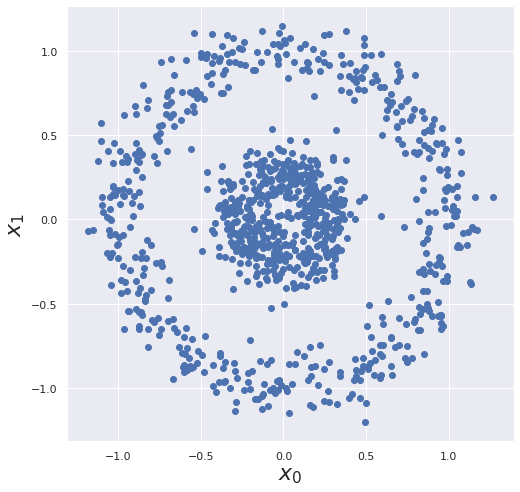

In [30]:
from sklearn.datasets import make_circles

X, _ = make_circles(n_samples=1000, factor=0.25, noise=0.1)

sns.set()

fig, ax = plt.subplots(figsize=(8, 8))

ax.scatter(X[:, 0], X[:, 1])
ax.set_xlabel(r"$x_0$", fontsize=22)
ax.set_ylabel(r"$x_1$", fontsize=22)
ax.grid(True)

plt.show()

The dataset is almost symmetrical; therefore, a standard PCA can easily detectthe principal components that are orthogonal and with about the same magnitude.However, this couldn't be enough to perform a dimensionality reduction thattakes into account the actual semantics of the dataset. In fact, in this case, the innerblob is clearly a dense component separated by the surrounding circle, and it canbe necessary to highlight this property in order to understand which componentshave a larger impact on the explained variance.To solve this problem, it's necessary that we perform a preprocessing transformation.

 We are notgoing to delve into all the mathematical theory (which requires more space and isbeyond the scope of this book), but it suffices to say that, given a feature map $Ψ(\bar{x_i})$ under mild conditions, it's possible to find a kernel that is equal to:

 ## $$K(\bar{x_i}, \bar{x_j}) = Ψ(\bar{x_i})^TΨ(\bar{x_j})$$

 In other words, the dot product in the feature space is simply the kernelevaluated for the two points. The PCA is based on the eigendecompositionof the covariance matrix. It's straightforward to understand that workingwith the Gram matrix induced by the kernel is analogous to working witha covariance matrix in the feature space. 

  Our example can be easily solved byemploying a **radial basis function (RBF) kernel**:

  ![Imgur](https://imgur.com/0HeJ2xv.png)


  Obviously, the corresponding feature space is radial (so invariant to the angle) and,through the parameter λλ, it is possible to control the amplitude of the Gaussian curve(so as to capture or exclude specific regions).Let's now perform the kernel PCA using an RBF kernel:





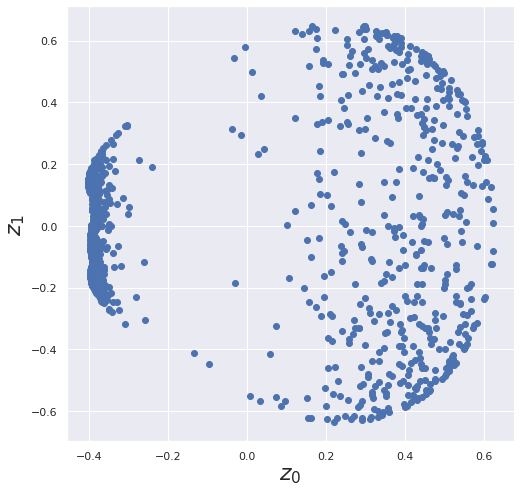

In [31]:
from sklearn.decomposition import KernelPCA

# Perform a kernel PCA (with radial basis function)
kpca = KernelPCA(
    n_components=2,
    kernel="rbf",
    fit_inverse_transform=True,
    gamma=5,
    random_state=1000,
)
X_kpca = kpca.fit_transform(X)

# Plot the dataset after PCA
fig, ax = plt.subplots(figsize=(8, 8))

ax.scatter(kpca.X_transformed_fit_[:, 0], kpca.X_transformed_fit_[:, 1])
ax.set_xlabel(r"$z_0$", fontsize=22)
ax.set_ylabel(r"$z_1$", fontsize=22)
ax.grid(True)

plt.show()

In above case, we have chosen γ = 5 because the average separation between thecenter and border is about 0.5, and so the standard deviation of the Gaussian isσσ=1γγ⁄ = 0.2. After about three standard deviations, the value is approximately null,and therefore we should be able to perfectly separate the regions. 

It's possible to use a single component ($\bar{z_0}$) to separate thedataset, while the second one (corresponding to the angle) is negligible because thedispersion is only due to the noise.